In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Layer, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('Dataset_timeseries.csv')


scaler = StandardScaler()
df['SOPAS'] = scaler.fit_transform(df[['SOPAS']])


sequence_length = 100
num_features = 1


sequences = []
labels = []
for start in range(len(df) - sequence_length):
    end = start + sequence_length
    sequences.append(df['SOPAS'].values[start:end])
    labels.append(df['Number'].values[end])
sequences = np.array(sequences).reshape(-1, sequence_length, num_features)
labels = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)






In [2]:
model = Sequential()
model.add(Input(shape=(sequence_length, num_features)))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

model.save('finallyTrained.h5')

from google.colab import files
files.download('finallyTrained.h5')
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_classes))
import json


report_dict = classification_report(y_test, y_pred_classes, output_dict=True)


with open('classification_report.json', 'w') as f:
    json.dump(report_dict, f, indent=4)

Epoch 1/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.6478 - loss: 0.7217 - val_accuracy: 0.6937 - val_loss: 0.7301
Epoch 2/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - accuracy: 0.7158 - loss: 0.6021 - val_accuracy: 0.7676 - val_loss: 0.5206
Epoch 3/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.7877 - loss: 0.4789 - val_accuracy: 0.8757 - val_loss: 0.2987
Epoch 4/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8708 - loss: 0.3135 - val_accuracy: 0.9155 - val_loss: 0.2064
Epoch 5/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.9010 - loss: 0.2382 - val_accuracy: 0.9312 - val_loss: 0.1683
Epoch 6/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9195 - loss: 0.1943 - val_accuracy: 0.9332 - val_loss: 0.1655
Epoch 7/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9296 - loss: 0.1709 - val_accuracy: 0.9379 - val_loss: 0.1461
Epoch 8/50
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9365 -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1279/1279 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9930 - loss: 0.0185
Test Loss: 0.018886718899011612
Test Accuracy: 0.9928635954856873
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16389
           1       0.98      0.98      0.98      4048
           2       0.98      0.98      0.98      5380
           3       1.00      1.00      1.00     15100

    accuracy                           0.99     40917
   macro avg       0.99      0.99      0.99     40917
weighted avg       0.99      0.99      0.99     40917



In [3]:
newModel=tf.keras.models.load_model('finallyTrained.h5')
newModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,206 (325.03 KB)

 Trainable params: 83,204 (325.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_classes))
import json


report_dict = classification_report(y_test, y_pred_classes, output_dict=True)


with open('classification_report.json', 'w') as f:
    json.dump(report_dict, f, indent=4)

1279/1279 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16389
           1       0.98      0.98      0.98      4048
           2       0.98      0.98      0.98      5380
           3       1.00      1.00      1.00     15100

    accuracy                           0.99     40917
   macro avg       0.99      0.99      0.99     40917
weighted avg       0.99      0.99      0.99     40917



In [5]:
from sklearn.metrics import f1_score

f1_scores_per_class = f1_score(y_test, y_pred_classes, average=None)


f1_score_macro = f1_score(y_test, y_pred_classes, average='macro')
f1_score_micro = f1_score(y_test, y_pred_classes, average='micro')
f1_score_weighted = f1_score(y_test, y_pred_classes, average='weighted')


print("F1 Score per class:", f1_scores_per_class)
print("Macro F1 Score:", f1_score_macro)
print("Micro F1 Score:", f1_score_micro)
print("Weighted F1 Score:", f1_score_weighted)


with open('f1_scores.txt', 'w') as f:
    f.write("F1 Score per class: {}\n".format(f1_scores_per_class))
    f.write("Macro F1 Score: {}\n".format(f1_score_macro))
    f.write("Micro F1 Score: {}\n".format(f1_score_micro))
    f.write("Weighted F1 Score: {}\n".format(f1_score_weighted))

F1 Score per class: [0.99740751 0.98207885 0.98075314 0.99513261]
Macro F1 Score: 0.9888430279246394
Micro F1 Score: 0.9928636019258499
Weighted F1 Score: 0.9928616755842614


1279/1279 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


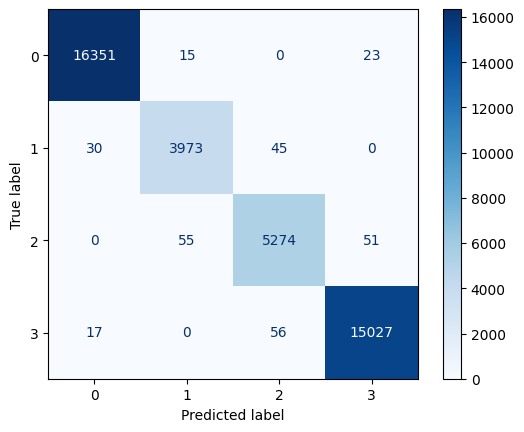

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,614 (975.06 KB)

 Trainable params: 83,204 (325.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 166,410 (650.04 KB)

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # replace with your class names

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(4))
disp.plot(cmap=plt.cm.Blues)
plt.show()
model.summary()